_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [5]:
pd.options.display.max_columns = None

In [6]:
df = pd.merge(income, lifespan)

In [7]:
df.shape

(41790, 4)

In [16]:
entities

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america
5,akr_a_dhe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Akrotiri and Dhekelia,Akrotiri_Dhekelia,i2,NaN,True,NaN,NaN,NaN,NaN,coastline,NaN,NaN,NaN,Akrotiri and Dhekelia,NaN,False,NaN,NaN,europe,europe_central_asia
6,ala,NaN,√Öland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Åland,AX,i258,NaN,True,AX,ALA,248.0,NaN,coastline,60.25000,20.00000,NaN,Åland,NaN,False,AX,AALAND ISLANDS,europe,europe_central_asia
7,alb,NaN,NaN,NaN,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,others,Albania,AL,i3,upper_middle_income,True,AL,ALB,8.0,NaN,coastline,41.00000,20.00000,muslim,Albania,ALBANIA,True,AL,ALBANIA,europe,europe_central_asia
8,and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Andorra,AD,i6,high_income,True,AD,AND,20.0,NaN,landlocked,42.50779,1.52109,christian,Andorra,NaN,True,AD,ANDORRA,europe,europe_central_asia
9,ant,NaN,Neth. Antilles,NaN,NaN,Netherland Antilles,NaN,NaN,NaN,NaN,NaN,NaN,others,Netherlands Antilles,AN,i157,NaN,True,NaN,NaN,NaN,NaN,coastline,NaN,NaN,NaN,Netherlands Antilles,NaN,False,NaN,NETHERLANDS ANTILLES,americas,america


In [15]:
entities[entities.country=='abw'].T

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [9]:
variables = ['country', 'name', 'world_6region']
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [10]:
df = pd.merge(df, population)

In [11]:
pd.merge(df, entities[variables], 
         how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,america
1,abw,1801,833,34.42,19286,abw,Aruba,america
2,abw,1802,833,34.42,19286,abw,Aruba,america
3,abw,1803,833,34.42,19286,abw,Aruba,america
4,abw,1804,833,34.42,19286,abw,Aruba,america


In [12]:
df = pd.merge(df, entities[variables], 
              how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)


In [13]:
df.shape

(41790, 6)

In [14]:
df.head() #we have the categories we want for our plot

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [19]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,Vietnam,europe_central_asia
freq,219,10991


In [20]:
now = df[df.year==2018]
now.sample(15)

,year,income,lifespan,population,country,region
28870,2018,38900,78.06,4829946,Oman,middle_east_north_africa
6225,2018,16467,66.92,2333201,Botswana,sub_saharan_africa
7977,2018,751,62.42,84004989,"Congo, Dem. Rep.",sub_saharan_africa
15251,2018,13505,71.86,108339,Grenada,america
21815,2018,18254,75.47,6470956,Libya,middle_east_north_africa
5787,2018,76943,77.36,434076,Brunei,east_asia_pacific
21377,2018,13438,80.45,6093509,Lebanon,middle_east_north_africa
6006,2018,9929,74.83,817054,Bhutan,south_asia
1798,2018,21035,77.60,103050,Antigua and Barbuda,america
20939,2018,68359,79.96,4197128,Kuwait,middle_east_north_africa


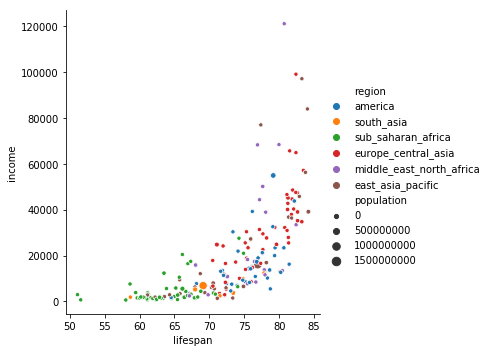

In [26]:
sns.relplot(x='lifespan', y='income', hue='region', size='population', data=now);

In [27]:
years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)]

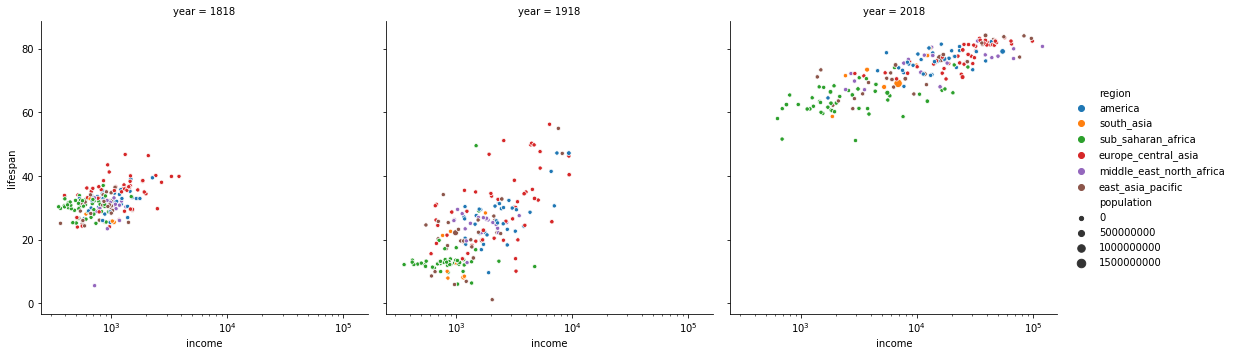

In [32]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data=centuries)
plt.xscale('log');

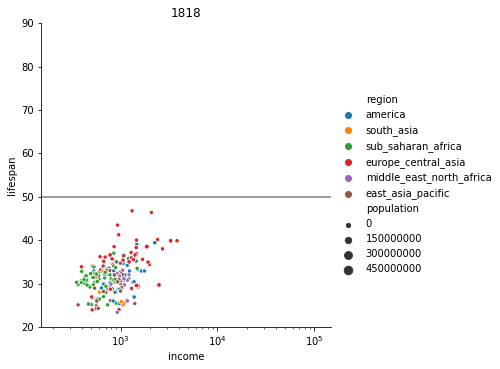

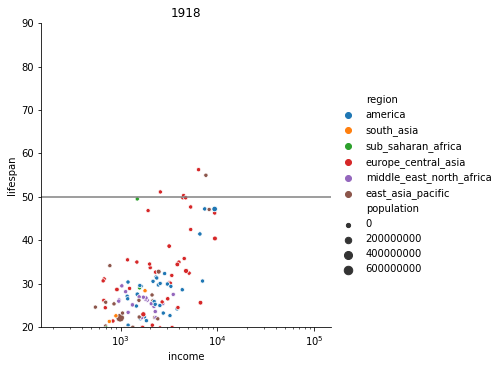

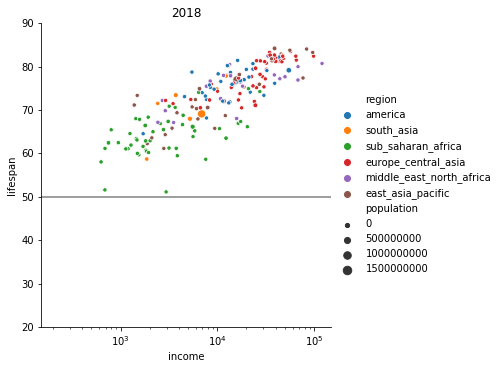

In [33]:
for year in years:

    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey');